In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# Known values
E0 = -3.7234 #eV
a0 = 3.63 #Angstrom
V0 = 11.96 #a0**3

# Define the Birch–Murnaghan equation for internal energy
def birch_murnaghan(a, B0, B0_prime):
    return E0 + (9 * V0 * B0 / 16) * (((a0 / a)**2 - 1)**3 * B0_prime + ((a0 / a)**2 - 1)**2 * (6 - 4 * (a0 / a)**2))

In [3]:
# data to fit 
a_list = np.array([3.48, 3.53, 3.58, 3.63, 3.68, 3.73, 3.78, 3.83])
E_list = np.array([-3.6235, -3.6805, -3.7126, -3.7234, -3.7164, -3.6944, -3.6598, -3.6149])

# Initial guess for the parameters B0 and B0_prime
p0 = 0.5, 15

# Perform the fit while fixing E0, a0, and V0
params, covariance = curve_fit(birch_murnaghan, a_list, E_list, p0)#, bounds=([0, 0], [np.inf, np.inf]))

In [4]:
# Extract the fitted parameters
B0_fit, B0_prime_fit = params

# Print the fitted parameters
print(f'E0: {E0}, a0: {a0}, V0: {V0}, B0: {B0_fit}, B0_prime: {B0_prime_fit}')

E0: -3.7234, a0: 3.63, V0: 11.96, B0: 0.8731870562377121, B0_prime: 6.26519437584524


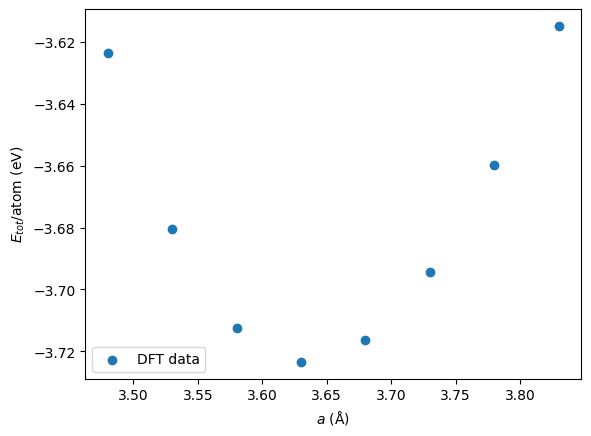

In [5]:
plt.scatter(a_list, E_list, label='DFT data')
plt.xlabel('$a$ (Å)')
plt.ylabel('$E_{tot}$/atom (eV)')
plt.legend(loc='lower left')
plt.savefig('e(a) no fit', dpi=300, bbox_inches='tight')

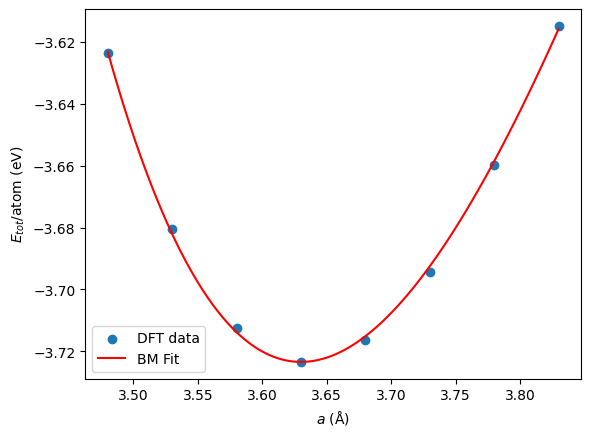

In [6]:
# Plot the data and the fitted curve
a_fit = np.linspace(min(a_list), max(a_list), 100)
E_fit = birch_murnaghan(a_fit, B0_fit, B0_prime_fit)
plt.scatter(a_list, E_list, label='DFT data')
plt.plot(a_fit, E_fit, label='BM Fit', color='r')
plt.xlabel('$a$ (Å)')
plt.ylabel('$E_{tot}$/atom (eV)')
plt.legend()
#plt.show()
plt.savefig("e(a)", dpi=300, bbox_inches='tight')